In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


# labelled size and domain- w2v @ gigaw 100 vs wiki 15 vs wiki 100

In [2]:
s = {'document_features_ev': 'SVO',
    'document_features_tr': 'J+N+V+SVO',
    'expansions__allow_overlap': 0, 
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__entries_of_id': None,
    'expansions__k': 3,
    'expansions__neighbour_strategy': 'linear',
    'expansions__noise': 0.0,
    'expansions__use_random_neighbours': 0,
    'expansions__use_similarity': 0,
    'expansions__vectors__algorithm__in': ['word2vec'],
    'expansions__vectors__composer__in': ['Verb', 'CopyObj', 'Add', 'Mult', 'FAdd', 'FMult'], 
    'expansions__vectors__dimensionality': 100,
    'expansions__vectors__rep': 0,
    'expansions__vectors__unlabelled_percentage__in': [15, 100],
    'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
print(ids, 'total', len(ids))

[250, 251, 252, 255, 256, 257, 260, 261, 262, 265, 266, 267, 344, 345, 346, 349, 350, 351] total 18


Calculating CI for exp 250
Calculating CI for exp 251
Calculating CI for exp 252
Calculating CI for exp 255
Calculating CI for exp 256
Calculating CI for exp 257
Calculating CI for exp 260
Calculating CI for exp 261
Calculating CI for exp 262
Calculating CI for exp 265
Calculating CI for exp 266
Calculating CI for exp 267
Calculating CI for exp 344
Calculating CI for exp 345
Calculating CI for exp 346
Calculating CI for exp 349
Calculating CI for exp 350
Calculating CI for exp 351
percent has 9000 values
algo has 9000 values
folds has 9000 values
Composer has 9000 values
Accuracy has 9000 values
unlab has 9000 values


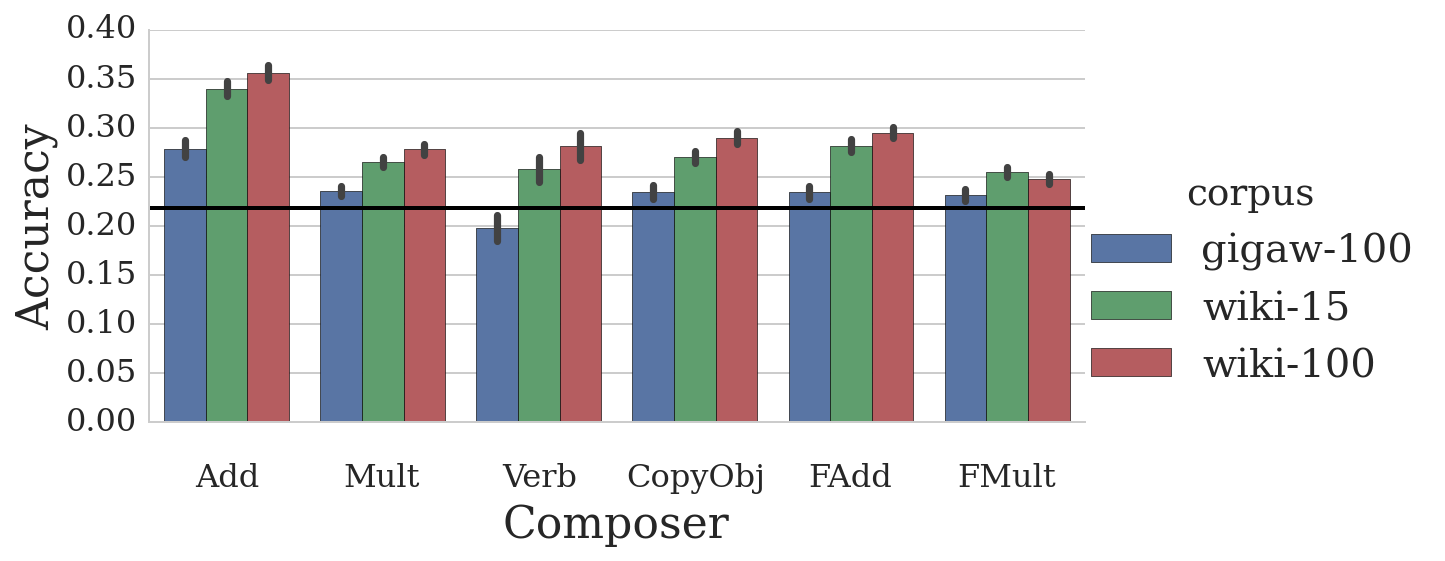

In [3]:
sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap


fields = {  'unlab': 'expansions__vectors__unlabelled',
            'algo': 'expansions__vectors__algorithm',
            'Composer': 'expansions__vectors__composer',
             'percent': 'expansions__vectors__unlabelled_percentage'}
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
df.drop(['unlab', 'percent'], axis=1, inplace=True)

g= sns.factorplot(y='Accuracy', x='Composer', hue='corpus',# col='unlab', 
                  hue_order=sort_df_by(df, 'corpus'), aspect=2,
                    data=df, kind='bar', ci=68);

for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
#     ax.axhline(nondistributional_baseline(**settings_of(ids[0])), c='k')

plt.axhline(random_vect_baseline(), c='k')
plt.savefig('plot-vps-corpus-size.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# w2v vs glove vs count @ wiki 100

[248, 249, 250, 253, 254, 255, 258, 259, 260, 263, 264, 265, 342, 343, 344, 347, 348, 349] total 18
Calculating CI for exp 248
Calculating CI for exp 249
Calculating CI for exp 253
Calculating CI for exp 254
Calculating CI for exp 258
Calculating CI for exp 259
Calculating CI for exp 263
Calculating CI for exp 264
Calculating CI for exp 342
Calculating CI for exp 343
Calculating CI for exp 347
Calculating CI for exp 348
Accuracy has 9000 values
folds has 9000 values
algo has 9000 values
Composer has 9000 values


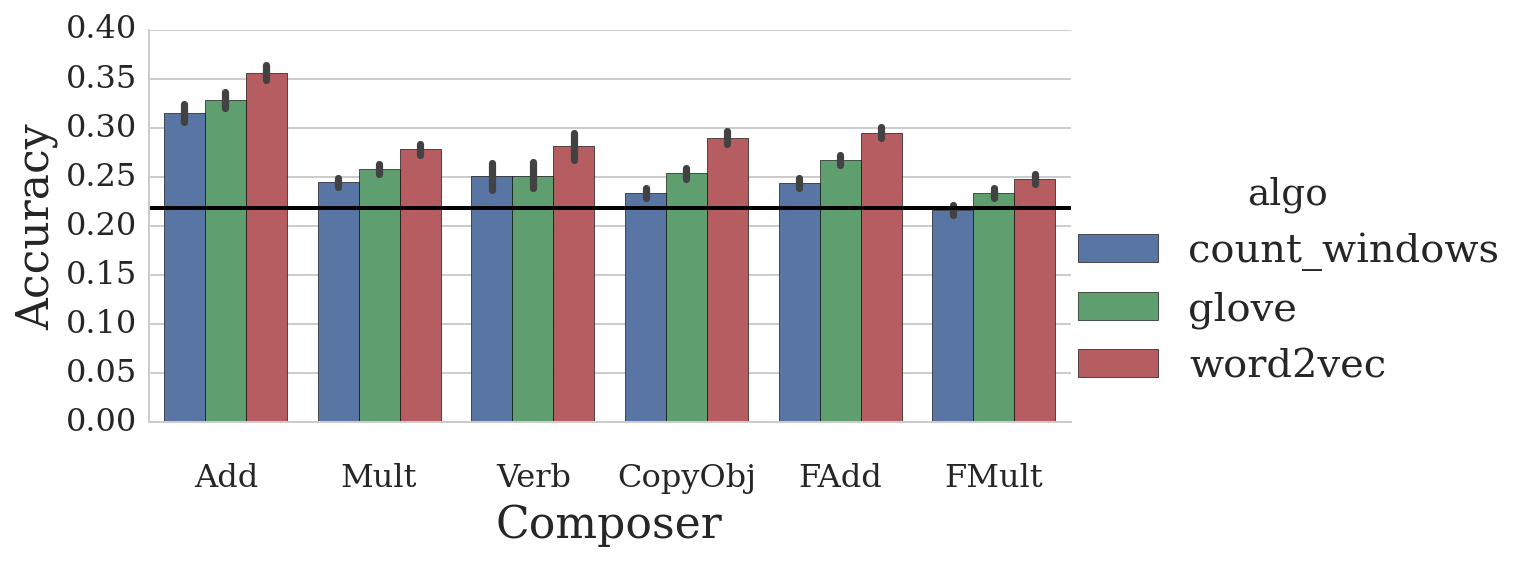

In [4]:
s['expansions__vectors__algorithm__in'] = ['word2vec', 'glove', 'count_windows']
s['expansions__vectors__composer__in'] = ['Verb', 'CopyObj', 'Add', 'Mult', 'FAdd', 'FMult']
s['expansions__vectors__unlabelled'] = 'wiki'
s['expansions__vectors__unlabelled_percentage__in'] = [100]
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
print(ids, 'total', len(ids))

fields = {'algo': 'expansions__vectors__algorithm',
          'Composer': 'expansions__vectors__composer'
}
df = dataframe_from_exp_ids(ids, fields, abbreviate=False)
g= sns.factorplot(y='Accuracy', x='Composer', hue='algo', 
                   data=df, kind='bar', aspect=2, ci=68);
plt.axhline(random_vect_baseline(), c='k')
plt.savefig('plot-vps-algorithm.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)